### We compute the color-ness of each image in DTD and visually sort images as output to inspect the results

In [2]:
import keras.backend as K
import numpy as np
import keras.datasets
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from memorization_utils import *
import os
from sklearn.linear_model import Ridge
import sys 
sys.path.append('../rcvs_fexps/')
sys.path.append('../rcvs_fexps/iMIMIC-RCVs/')
sys.path.append('../rcvs_fexps/iMIMIC-RCVs/scripts/')
sys.path.append('../rcvs_fexps/iMIMIC-RCVs/scripts/keras_vis_rcv/')
#from rcv_utils import *
from mnist_utils import *
import rcv_utils
import PIL

from scipy import misc
import numpy as np
#import tensorflow as tf
import argparse

In [3]:
## Load DTD data

In [4]:
source='/mnt/nas2/results/IntermediateResults/Mara/probes'
folders = os.listdir('{}/dtd/images/'.format(source))
textures = os.listdir('{}/dtd/images/'.format(source))
dataset = h5py.File('../corruption_exps/texture_data_all.h5', 'r')

In [5]:
def print_info(name, obj):
    print name 
dataset.visititems(print_info)
for t in textures:
    print dataset[t]
print dataset['random'] # note: random is not in textures list since it is used only for CAVs. 

banded
blotchy
braided
bubbly
bumpy
chequered
cobwebbed
cracked
crosshatched
crystalline
dotted
fibrous
flecked
freckled
frilly
gauzy
grid
grooved
honeycombed
interlaced
knitted
lacelike
lined
marbled
matted
meshed
paisley
perforated
pitted
pleated
polka-dotted
porous
potholed
random
scaly
smeared
spiralled
sprinkled
stained
stratified
striped
studded
swirly
veined
waffled
woven
wrinkled
zigzagged
<HDF5 dataset "marbled": shape (120, 299, 299, 3), type "|u1">
<HDF5 dataset "scaly": shape (120, 299, 299, 3), type "|u1">
<HDF5 dataset "bumpy": shape (120, 299, 299, 3), type "|u1">
<HDF5 dataset "stained": shape (120, 299, 299, 3), type "|u1">
<HDF5 dataset "sprinkled": shape (120, 299, 299, 3), type "|u1">
<HDF5 dataset "bubbly": shape (120, 299, 299, 3), type "|u1">
<HDF5 dataset "lined": shape (120, 299, 299, 3), type "|u1">
<HDF5 dataset "cracked": shape (120, 299, 299, 3), type "|u1">
<HDF5 dataset "interlaced": shape (120, 299, 299, 3), type "|u1">
<HDF5 dataset "honeycombed": shape

In [15]:
import flawed_utils
reload(flawed_utils)
from flawed_utils import * 

In [16]:
## Extract concept measures from DTD data. 
# Approach: 
# Analyze three main characteristics

# 1. TEXTURE
# 2. COLOR
# 3. SHAPE (?)

In [7]:
 cm = compute_concept_measures(dataset['porous'][:])

/home/mara/venv/local/lib/python2.7/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/mara/venv/local/lib/python2.7/site-packages/skimage/feature/texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):


In [8]:
concept_measures = cm.keys()

In [10]:
#plot dataset by comparing measures

In [11]:
dataset_cm = h5py.File('texture_data_with_cm.h5', 'r')

In [ ]:
'''
for t in textures:
    print t
for c in concept_measures:
    print c
'''
concepts_order = []
measures_list = []

for c in concept_measures[:1]:
    #print c
    for t in textures:
        #print t
        concepts_order.append(t)
        measures_list.append(dataset_cm['{}.{}'.format(t,c)])
    measures_all = np.asarray(measures_list)
    measures_all = measures_all.ravel()
    sorted_idxs = np.argsort(measures_all)
    plt.rcParams['figure.figsize']=(350,150)
    fig = plt.figure()
    print c
    #plt.text(0,0, '{}'.format(c))
    #plt.subplot(6,1,1)
    k=1
    for i in range(0,len(sorted_idxs),300):
        texture_idx = sorted_idxs[i]/120
        item_idx = sorted_idxs[i]%120
        #print concepts_order[texture_idx], measures_all[sorted_idxs[i]]
        image = dataset[concepts_order[texture_idx]][item_idx]
        plt.subplot(1,200,k)
        plt.imshow(image)
        #plt.title('{}: {}'.format(concepts_order[texture_idx], measures_all[sorted_idxs[i]]))
        plt.axis('off')
        k+=1

    
    
#dataset_cm['']

energy


ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/mara/venv/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/mara/venv/local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silen

In [ ]:
measures_all = np.asarray(measures_list)
measures_all = measures_all.ravel()

In [ ]:
sorted_idxs = np.argsort(measures_all)

In [ ]:
plt.rcParams['figure.figsize']=(20,50)
fig = plt.figure()
print c
#plt.text(0,0, '{}'.format(c))
#plt.subplot(6,1,1)
k=1
for i in [0,1,2, -3, -2, -1]:
    texture_idx = sorted_idxs[i]/120
    item_idx = sorted_idxs[i]%120
    print concepts_order[texture_idx], measures_all[sorted_idxs[i]]
    image = dataset[concepts_order[texture_idx]][item_idx]
    plt.subplot(1,6,k)
    plt.imshow(image)
    plt.title('{}: {}'.format(concepts_order[texture_idx], measures_all[sorted_idxs[i]]))
    plt.axis('off')
    k+=1


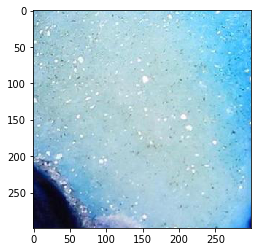

In [19]:
# raw tensor
raw_input = tf.image.convert_image_dtype(img, dtype=tf.float32)
raw_input.set_shape([None, None, 3])

# convert to lab-space image {L, a, b}
lab = rgb_to_lab(raw_input)
L_chan, a_chan, b_chan = preprocess_lab(lab)
lab = deprocess_lab(L_chan, a_chan, b_chan)

# get back the RGB image
true_image = lab_to_rgb(lab)
true_image = tf.image.convert_image_dtype(true_image, dtype=tf.uint8, saturate=True)

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init_op)
  # here is the image Tensor :)
  image = true_image.eval()  
  #print image
  #conv_img = PIL.Image.fromarray(image, 'RGB')
  #conv_img.save('converted_test.jpg')
  #conv_img.show()
  plt.imshow(image)

In [22]:
def compute_concept_measures_color(x_test):
    concept_measures={}
    concept_measures['colorfulness']=[]
    for i in range(len(x_test)):
        #glcm = greycomatrix(skimage.img_as_ubyte(skimage.color.rgb2gray(x_test[i])), [1], [0] , symmetric=True, normed=True)
        clrness = colorfulness(x_test[i]) # colorfulness is computed on RGB images
        #concept_measures['dissimilarity'].append(greycoprops(glcm, 'dissimilarity'))
        #concept_measures['contrast'].append(greycoprops(glcm, 'contrast'))
        #concept_measures['homogeneity'].append(greycoprops(glcm, 'homogeneity'))
        #concept_measures['ASM'].append( greycoprops(glcm, 'ASM'))
        concept_measures['colorfulness'].append(clrness)
    #print concept_measures
    for k in concept_measures.keys():
        concept_measures[k] = np.asarray(concept_measures[k])#.T[0][0]
    return concept_measures

In [165]:
dataset_cm_clr =  h5py.File('texture_data_with_cm_clr.h5', 'w')

In [166]:
for t in textures:
    #cm = compute_concept_measures(dataset[t][:])
    #for k in cm.keys():
        #dataset_cm['{}'.format(t)] = dataset[t][:]
    #    print t, k
    #    dataset_cm['{}.{}'.format(t, k)] = cm[k]
    #print t
    k = 'colorfulness'
    cm_clr = compute_concept_measures_color(dataset[t][:])
    dataset_cm_clr['{}.{}'.format(t,k)] = cm_clr[k]

In [167]:
dataset_cm_clr.visititems(print_info)

banded.colorfulness
blotchy.colorfulness
braided.colorfulness
bubbly.colorfulness
bumpy.colorfulness
chequered.colorfulness
cobwebbed.colorfulness
cracked.colorfulness
crosshatched.colorfulness
crystalline.colorfulness
dotted.colorfulness
fibrous.colorfulness
flecked.colorfulness
freckled.colorfulness
frilly.colorfulness
gauzy.colorfulness
grid.colorfulness
grooved.colorfulness
honeycombed.colorfulness
interlaced.colorfulness
knitted.colorfulness
lacelike.colorfulness
lined.colorfulness
marbled.colorfulness
matted.colorfulness
meshed.colorfulness
paisley.colorfulness
perforated.colorfulness
pitted.colorfulness
pleated.colorfulness
polka-dotted.colorfulness
porous.colorfulness
potholed.colorfulness
scaly.colorfulness
smeared.colorfulness
spiralled.colorfulness
sprinkled.colorfulness
stained.colorfulness
stratified.colorfulness
striped.colorfulness
studded.colorfulness
swirly.colorfulness
veined.colorfulness
waffled.colorfulness
woven.colorfulness
wrinkled.colorfulness
zigzagged.colorful

colorfulness


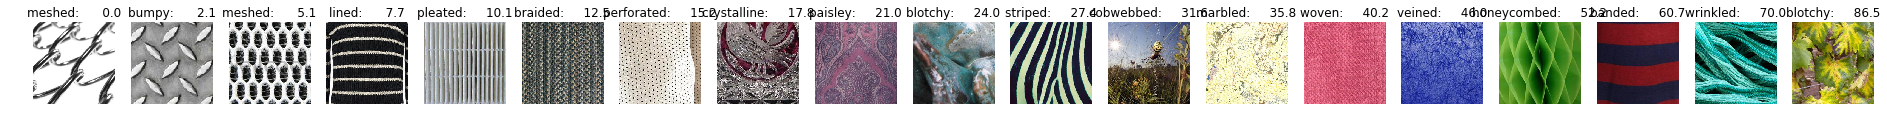

In [13]:
concepts_order = []
measures_list = []

for c in ['colorfulness']:
    #print c
    for t in textures:
        #print t
        concepts_order.append(t)
        measures_list.append(dataset_cm_clr['{}.{}'.format(t,c)])
    measures_all = np.asarray(measures_list)
    measures_all = measures_all.ravel()
    sorted_idxs = np.argsort(measures_all)
    plt.rcParams['figure.figsize']=(350,150)
    fig = plt.figure()
    print c
    #plt.text(0,0, '{}'.format(c))
    #plt.subplot(6,1,1)
    k=1
    for i in range(0,len(sorted_idxs),300):
        texture_idx = sorted_idxs[i]/120
        item_idx = sorted_idxs[i]%120
        #print concepts_order[texture_idx], measures_all[sorted_idxs[i]]
        image = dataset[concepts_order[texture_idx]][item_idx]
        plt.subplot(1,200,k)
        plt.imshow(image)
        plt.title('{0}: {1:8.1f}'.format(concepts_order[texture_idx], measures_all[sorted_idxs[i]]))
        plt.axis('off')
        k+=1

    
    
#dataset_cm['']

colorfulness


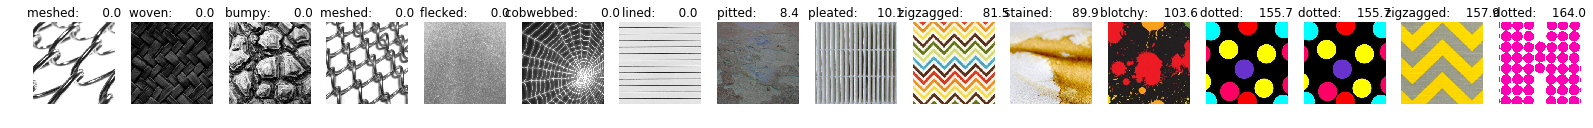

In [14]:
concepts_order = []
measures_list = []

for c in ['colorfulness']:
    #print c
    for t in textures:
        #print t
        concepts_order.append(t)
        measures_list.append(dataset_cm_clr['{}.{}'.format(t,c)])
    measures_all = np.asarray(measures_list)
    measures_all = measures_all.ravel()
    sorted_idxs = np.argsort(measures_all)
    plt.rcParams['figure.figsize']=(350,150)
    fig = plt.figure()
    print c
    #plt.text(0,0, '{}'.format(c))
    #plt.subplot(6,1,1)
    k=1
    for i in [0,1,2,3,30, 50, 100, 1000, 1200, -300, -200, -100, -4,-3,-2,-1]:
        texture_idx = sorted_idxs[i]/120
        item_idx = sorted_idxs[i]%120
        #print concepts_order[texture_idx], measures_all[sorted_idxs[i]]
        image = dataset[concepts_order[texture_idx]][item_idx]
        plt.subplot(1,200,k)
        plt.imshow(image)
        plt.title('{0}: {1:8.1f}'.format(concepts_order[texture_idx], measures_all[sorted_idxs[i]]))
        plt.axis('off')
        k+=1

In [24]:
def histograms(image):
    #hist = cv2.calcHist([image],
    #                    [0, 1, 2],
    #                    None, 
    #                    [8, 8, 8],
    #                    [0, 256, 0, 256, 0, 256])
    #print "3D histogram shape: %s, with %d values" % (
    #       hist.shape, hist.flatten().shape[0])
    chans = cv2.split(image)
    features = []
    colors = ("b", "g", "r")
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and
        # concatenate the resulting histograms for each
        # channel
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        features.extend(hist)

        # plot the histogram
        plt.plot(hist, color = color)
        plt.xlim([0, 256])
    return hist

In [25]:
img = dataset['porous'][107]

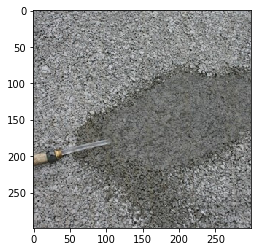

In [26]:
plt.imshow(img)

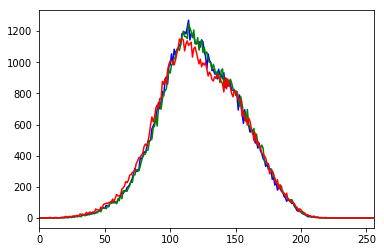

In [27]:
h = histograms(img)

In [28]:
def hsv_histograms(image):
    hist_hue = cv2.calcHist([image], [0], None, [180], [0, 180])
    hist_sat = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_val = cv2.calcHist([image], [2], None, [256], [0, 256])
    print np.mean(image[:,:,0])
    print np.min(image[:,:,0])
    print np.max(image[:,:,0])
    
    return hist_hue, hist_sat, hist_val

In [29]:
color_picker('black')

array([[[0, 0, 0]]], dtype=uint8)

In [30]:
def color_picker(color_name):
    brg_colors={}
    brg_colors['red']= np.uint8([[[0,0,255 ]]])
    brg_colors['orange'] = np.uint8([[[0,128,255 ]]])
    brg_colors['yellow'] = np.uint8([[[0,255,255 ]]]) 
    brg_colors['green'] = np.uint8([[[0,255,0 ]]])
    brg_colors['cyano'] = np.uint8([[[255,255,0 ]]])
    brg_colors['blue'] = np.uint8([[[255,0,0]]])
    brg_colors['purple'] = np.uint8([[[255,0,128]]])
    brg_colors['magenta'] = np.uint8([[[255,0,255 ]]])
    brg_colors['white'] = np.uint8([[[255,255,255 ]]])
    brg_colors['black'] = np.uint8([[[0,0,0 ]]])
    
    rgb_color_code = brg_colors[color_name]
    return cv2.cvtColor(rgb_color_code,cv2.COLOR_BGR2HSV)
def round_hue(hue_val):
    hues = np.arange(0,180)
    if hue_val<180:
        hue_def = hues[hue_val]
    else:
        hue_def = hues[(hue_val)%179]
    return hue_def
def quantize_hue_ranges(image, color_name):
    if color_name == 'red':
        hue_min = 165
        hue_max = 10
    
    elif color_name == 'orange':
        hue_min = 10
        hue_max = 25
    elif color_name == 'yellow':
        hue_min = 25
        hue_max = 40
    elif color_name == 'green':
        hue_min = 40
        hue_max = 75
    elif color_name == 'cyano':
        hue_min = 75
        hue_max = 100
    elif color_name == 'blue':
        hue_min = 100
        hue_max = 125
    elif color_name == 'purple':
        hue_min = 125
        hue_max = 145
    elif color_name == 'magenta':
        hue_min = 145
        hue_max = 165
    elif (color_name == 'white' or color_name == 'black'):
        hue_min = 0
        hue_max = 255
        
    return hue_min, hue_max

In [31]:
def colorness(image, color_name, threshold = 0, verbose=False):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    #plt.imshow(image)
    if verbose:
        h,s,v = hsv_histograms(image)
        plt.figure()
        plt.plot(h)
        plt.figure()
        plt.plot(s)
        plt.figure()
        plt.plot(v)
    
    if threshold == 0: 
        hue_min, hue_max = quantize_hue_ranges(image, color_name)
        if verbose:
            print 'hue min, hue max: ', hue_min, hue_max
    else: 
        h_point =color_picker(color_name)
        hue_min = round_hue(h_point[0][0][0]-threshold)
        hue_max = round_hue(h_point[0][0][0]+threshold)
        if verbose:
            print 'hue min, hue max: ', hue_min, hue_max
    '''
    if verbose:
        print 'red', color_picker(brg_colors['red'])
        print 'orange', color_picker(brg_colors['orange'])
        print 'yellow', color_picker(brg_colors['yellow'])
        print 'green', color_picker(brg_colors['green'])
        print 'cyano', color_picker(brg_colors['cyano'])
        print 'blue', color_picker(brg_colors['blue'])
        print 'purple', color_picker(brg_colors['purple'])
        print  'magenta', color_picker(brg_colors['magenta'])
    '''
    if (hue_min == hue_max == 0) or (hue_min == 0 and hue_max == 255): 
        #it is either black or white
        if color_name=='black':
            low_c = np.array([0,
                              0,
                              0])
            upp_c = np.array([hue_max,
                              100,
                              100])
        if color_name=='white':
            low_c = np.array([0,
                              0,
                              190])
            upp_c = np.array([hue_max,
                              170,
                              255])
        
        if verbose:        
            print 'low_c', low_c, 'upp_c', upp_c

        mask = cv2.inRange(image, low_c, upp_c)
        
    elif hue_min>hue_max:
        low_c = np.array([0,
                      50,
                      77])
        upp_c = np.array([hue_max,
                      255,
                      255])
        mask1 = cv2.inRange(image, low_c, upp_c)
        
        low_c = np.array([hue_min,
                      50,
                      77])
        upp_c = np.array([180,
                      255,
                      255])
        mask2 = cv2.inRange(image, low_c, upp_c)
        
        mask = cv2.bitwise_or(mask1, mask1, mask2)
    
    else:
        low_c = np.array([hue_min,
                          50,
                          77])
        upp_c = np.array([hue_max,
                          255,
                          255])
        if verbose:        
            print 'low_c', low_c, 'upp_c', upp_c

        mask = cv2.inRange(image, low_c, upp_c)
    if verbose:
        print mask
   
    res = cv2.bitwise_and(image, image, mask = mask)
    if verbose:
        plt.figure()
        plt.imshow(mask, cmap='Greys')
        plt.colorbar()

        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB))
        plt.figure()
        plt.imshow(cv2.cvtColor(res, cv2.COLOR_HSV2RGB))
    
    #print np.sum(mask==255)
    if verbose:
        print np.sum(mask==255)/(299.0*299.0)
    
    return float(np.sum(mask==255))/(299.0*299.0)

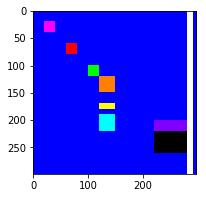

In [130]:
blue_image=np.ones((299,299,3))
blue_image[:,:,0] *= 255
blue_image[:,:,1] = 0
blue_image[:,:,2] = 0
blue_image[20:40,20:40,2] += 255 #magenta

blue_image[60:80,60:80, 0] -= 255 #red
blue_image[60:80,60:80, 2] += 255 

blue_image[100:120,100:120, 0] -= 255 # green
blue_image[100:120,100:120, 1] += 255

blue_image[120:150,120:150, 0] -= 255 # orange
blue_image[120:150,120:150, 1] += 128
blue_image[120:150,120:150, 2] += 255

blue_image[170:180,120:150, 0] = 0 # yellow
blue_image[170:180,120:150, 1] = 255
blue_image[170:180,120:150, 2] = 255


blue_image[190:220,120:150, 0] = 255 # cyano
blue_image[190:220,120:150, 1] = 255
blue_image[190:220,120:150, 2] = 0

blue_image[200:220,220:280, 0] = 255 # purple
blue_image[200:220,220:280, 1] = 0
blue_image[200:220,220:280, 2] = 127

blue_image[220:260,220:280, 0] = 0 # black
blue_image[220:260,220:280, 1] = 0
blue_image[220:260,220:280, 2] = 0

blue_image[0:299,280:291, 0] = 255 # white
blue_image[0:299,280:291, 1] = 255
blue_image[0:299,280:291, 2] =255

blue_image = PIL.Image.fromarray(blue_image.astype('uint8'))
plt.imshow(cv2.cvtColor(np.asarray(blue_image), cv2.COLOR_BGR2RGB))


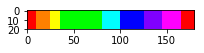

In [131]:
color_bar=np.ones((20,180,3))*255
#red 0-10
color_bar[:,0:10,0]=0 
color_bar[:,0:10,1]=0
color_bar[:,0:10,2]=255
color_bar[:,160:180,0]=0 
color_bar[:,160:180,1]=0
color_bar[:,160:180,2]=255
#orange 
color_bar[:,10:25,0]=0 
color_bar[:,10:25,1]=128
color_bar[:,10:25,2]=255
#yellow
color_bar[:,25:40,0]=0 
color_bar[:,25:40,1]=255
color_bar[:,25:40,2]=255
#green 
color_bar[:,35:80,0]=0 
color_bar[:,35:80,1]=255
color_bar[:,35:80,2]=0
#cyano
color_bar[:,80:100,0]=255
color_bar[:,80:100,1]=255
color_bar[:,80:100,2]=0
#blue
color_bar[:,100:125,0]=255 
color_bar[:,100:125,1]=0
color_bar[:,100:125,2]=0
#purple
color_bar[:,125:145,0]=255 
color_bar[:,125:145,1]=0
color_bar[:,125:145,2]=128
#magenta
color_bar[:,145:165,0]=255 
color_bar[:,145:165,1]=0
color_bar[:,145:165,2]=255


color_bar = PIL.Image.fromarray(color_bar.astype('uint8'))
plt.imshow(cv2.cvtColor(np.asarray(color_bar), cv2.COLOR_BGR2RGB))

In [132]:
np.asarray(color_bar).shape

(20, 180, 3)

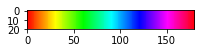

In [133]:
#TODO print original hue to compare

h_colr_bar = np.ones((20,180,3), dtype='uint8') 
h_colr_bar = cv2.cvtColor(h_colr_bar, cv2.COLOR_BGR2HSV)
h_colr_bar[:,:,0] = np.arange(180, dtype='uint8')
h_colr_bar[:,:,1] = 255
h_colr_bar[:,:,2] = 255

plt.imshow(cv2.cvtColor(np.asarray(h_colr_bar), cv2.COLOR_HSV2RGB))

110.23299515665373
0
150
hue min, hue max:  0 255
low_c [0 0 0] upp_c [255 100 100]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.026845337300477622
0.0268453373005


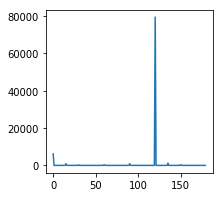

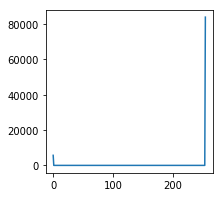

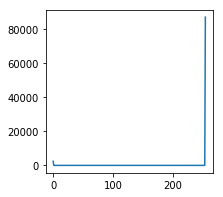

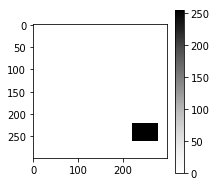

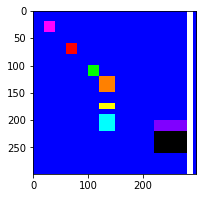

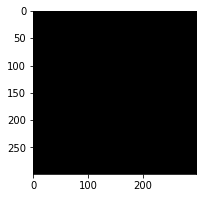

In [188]:
print colorness(np.asarray(blue_image),'black', threshold=0, verbose=True)
# result: 0.0044742 .. which corresponds to the truth (20x20 square 

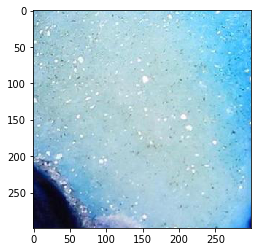

In [13]:
i = 97
img = dataset['crystalline'][i]
plt.imshow(img)

18.055748817127323
0
179
hue min, hue max:  0 255
low_c [0 0 0] upp_c [255 100 100]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
0.1674925336405633
0.167492533641


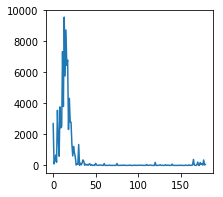

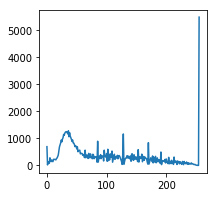

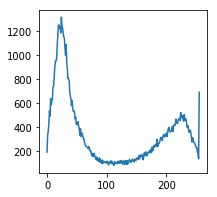

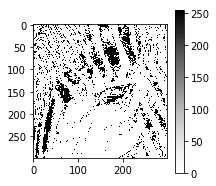

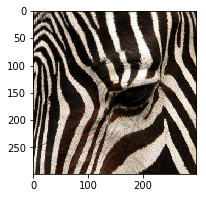

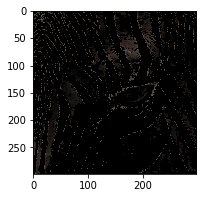

In [164]:
print colorness(cv2.cvtColor(img,cv2.COLOR_RGB2BGR), 'black', threshold=0, verbose=True)

In [32]:
def get_color_mask(image, color_name, threshold=0, verbose=False):
    image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    
    if threshold == 0: 
        hue_min, hue_max = quantize_hue_ranges(image, color_name)
        if verbose:
            print 'hue min, hue max: ', hue_min, hue_max
    else: 
        h_point =color_picker(color_name)
        hue_min = round_hue(h_point[0][0][0]-threshold)
        hue_max = round_hue(h_point[0][0][0]+threshold)
        if verbose:
            print 'hue min, hue max: ', hue_min, hue_max
    '''
    if verbose:
        print 'red', color_picker(brg_colors['red'])
        print 'orange', color_picker(brg_colors['orange'])
        print 'yellow', color_picker(brg_colors['yellow'])
        print 'green', color_picker(brg_colors['green'])
        print 'cyano', color_picker(brg_colors['cyano'])
        print 'blue', color_picker(brg_colors['blue'])
        print 'purple', color_picker(brg_colors['purple'])
        print  'magenta', color_picker(brg_colors['magenta'])
    '''
    if (hue_min == hue_max == 0) or (hue_min == 0 and hue_max == 255): 
        print 'black or white', color_name
        #it is either black or white
        if color_name=='black':
            print 'in black'
            low_c = np.array([0,
                              0,
                              0])
            upp_c = np.array([hue_max,
                              100,
                              100])
        if color_name=='white':
            print 'in white'
            low_c = np.array([0,
                              0,
                              190])
            upp_c = np.array([hue_max,
                              170,
                              255])
            
        mask = cv2.inRange(image, low_c, upp_c)
        return mask
    if hue_min>hue_max:
        low_c = np.array([0,
                      50,
                      77])
        upp_c = np.array([hue_max,
                      255,
                      255])
        mask1 = cv2.inRange(image, low_c, upp_c)
        
        low_c = np.array([hue_min,
                      50,
                      77])
        upp_c = np.array([180,
                      255,
                      255])
        mask2 = cv2.inRange(image, low_c, upp_c)
        
        mask = cv2.bitwise_or(mask1, mask1, mask2)
    
    else:
        low_c = np.array([hue_min,
                          50,
                          77])
        upp_c = np.array([hue_max,
                          255,
                          255])
        if verbose:        
            print 'low_c', low_c, 'upp_c', upp_c

        mask = cv2.inRange(image, low_c, upp_c)
    if verbose:
        print mask
    return mask

In [33]:
def image_colors(image, threshold=0):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    new_image = np.ones((299,299,3), dtype='uint8')*255
    #print new_image
    #new_image = cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB)
    #plt.imshow(new_image)
    #new_image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    colors = ['black', 'white', 'red', 'orange','yellow', 'green', 'cyano', 'blue', 'purple', 'magenta']
    #plt.imshow(image)

    for c in colors:
        #print c
        color_mask = get_color_mask(image, c, threshold=threshold)
        #plt.figure()
        #plt.imshow(color_mask)
        #print color_mask
        #plt.figure()
        #plt.title(c)
        #new_image =  cv2.cvtColor(new_image,cv2.COLOR_RGB2HSV)
        new_image = recolor(new_image, color_mask, c)
        #new_image =  cv2.cvtColor(new_image,cv2.COLOR_HSV2RGB)
        #plt.imshow(new_image)
        #plt.figure()
        #plt.imshow(color_mask)
        
        #
    new_image =  cv2.cvtColor(new_image,cv2.COLOR_HSV2RGB)  
    plt.figure()
    plt.imshow(new_image)
    #print new_image
    return new_image

def recolor(image, color_mask, color_name):
    color_hues = {}
    color_hues['red']=5
    color_hues['orange']=15
    color_hues['yellow']=30
    color_hues['green']=50
    color_hues['cyano']=90
    color_hues['blue']=120
    color_hues['purple']=140
    color_hues['magenta']=160
    color_hues['black']=0
    color_hues['white']=0
    
    if color_name == 'black':
        image[color_mask==255] = (0,0,0)

    elif color_name == 'white':
        image[color_mask==255] = (0,0,255)
    else:
        #print image[color_mask==255].shape
        image[color_mask==255] = (color_hues[color_name],255,255)
        #print image.shape

        #plt.imshow(image)
    return image
        

black or white black
in black
black or white white
in white


array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

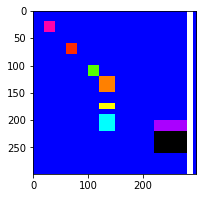

In [246]:
image_colors(np.asarray(blue_image))

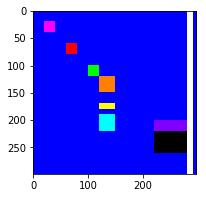

In [247]:
plt.rcParams['figure.figsize']=(3,3)
plt.imshow(cv2.cvtColor(np.asarray(blue_image), cv2.COLOR_BGR2RGB))


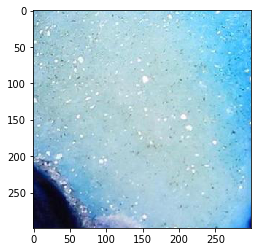

In [41]:
img = dataset['crystalline'][97]
plt.imshow(img)

In [62]:
def hashcode_to_image(hashcode):
    texture_idx = hashcode/120
    item_idx = hashcode%120
    return texture_idx, item_idx

In [144]:
color_list = ['red', 'orange', 'yellow', 'green', 'cyano', 'blue', 'purple', 'magenta']

all_colorness = {}
measures = {}
hashcode = 0
for t in textures:
    for i in range(120):
        colornesses = {}
        img = cv2.cvtColor(dataset[t][i], cv2.COLOR_RGB2BGR)
        for c in color_list:
            colornesses[c] = colorness(img,c)
        measures['{}.{}'.format(t,i)] = colornesses

for c in color_list:
    all_colorness[c]=[]
    for t in textures:
        for i in range(120):    
            all_colorness[c].append(measures['{}.{}'.format(t, i)][c]) 
        #hashcode+=1
        #print 'texture: {}, sample: {}, colornesses: {}'.format(t, i, colornesses)

In [151]:
measures['bubbly.1']['blue']

0.0

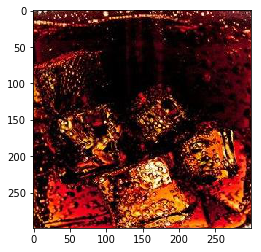

In [72]:
plt.imshow(dataset['bubbly'][1])

In [81]:
sorted_blue_idxs = np.argsort(all_colorness['blue'])

In [82]:
sorted_blue_idxs

array([   0, 4517, 2441, ..., 3685, 2553, 2097])

In [90]:
all_colorness['cyano'][-1]

0.0

In [85]:
hashcode_to_image(2097)

(17, 57)

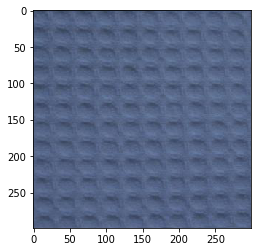

In [86]:
plt.imshow(dataset[textures[17]][57])

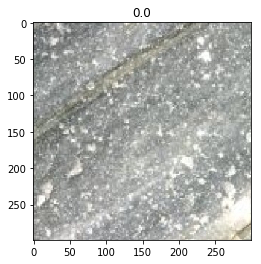

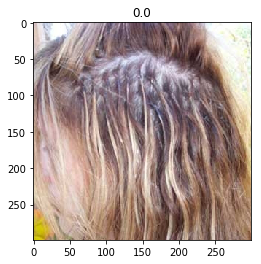

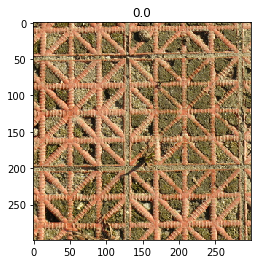

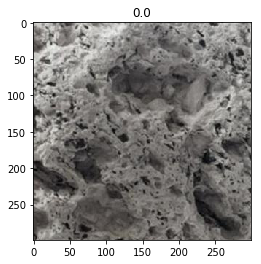

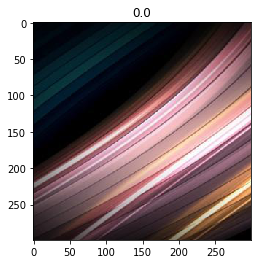

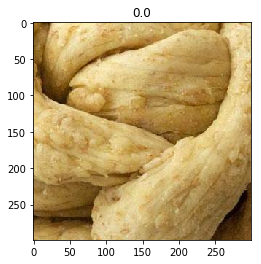

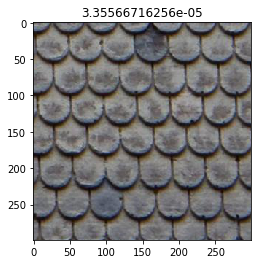

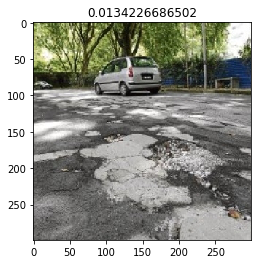

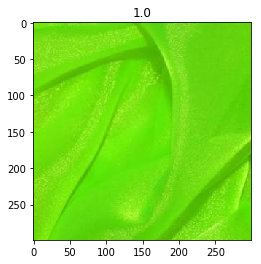

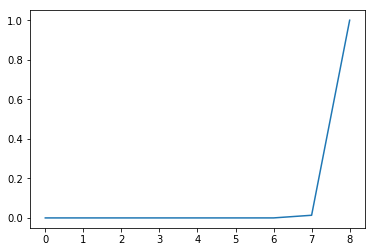

In [102]:
c = 'green'
colorness_curve = []

for i in [0,10,100,1000,2000,3000,4000,5000,-1]:
    sorted_idxs = np.argsort(all_colorness[c])
    colorness_curve.append(all_colorness[c][sorted_idxs[i]])
    t,j = hashcode_to_image(sorted_idxs[i])
    plt.figure()
    plt.title(all_colorness[c][sorted_idxs[i]])
    plt.imshow(dataset[textures[t]][j])
plt.figure()
plt.plot(np.asarray(colorness_curve))

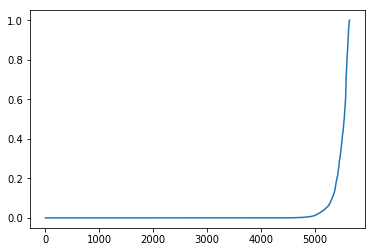

In [103]:
plt.plot(np.sort(all_colorness[c]))

0
11
27
28
3
9


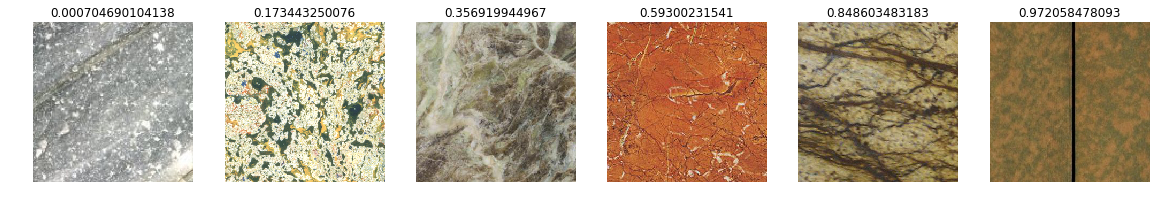

In [143]:
plt.rcParams['figure.figsize']=(20,10)
c = 'orange'
colorness_curve = []
plt.plot(np.sort(all_colorness[c]))

colorness_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

k=1
for cv in colorness_values:
    idx = np.argwhere(np.around(np.asarray(all_colorness[c]), decimals=1)==cv)[0]
    print idx[0]
    #colorness_curve.append(all_colorness[c][sorted_idxs[i]])
    t,j = hashcode_to_image(idx[0])
    #plt.figure()
    plt.subplot(1,6,k)
    plt.title(all_colorness[c][idx[0]])
    plt.imshow(dataset[textures[t]][j])
    plt.axis('off')
    k+=1
#plt.figure()
#plt.plot(np.asarray(colorness_curve))

0
73
157
285
187
240


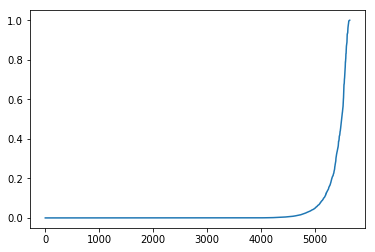

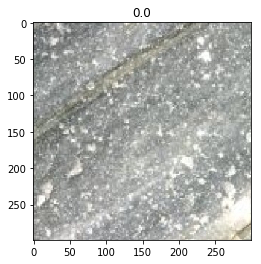

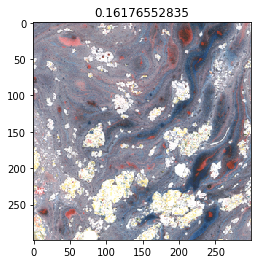

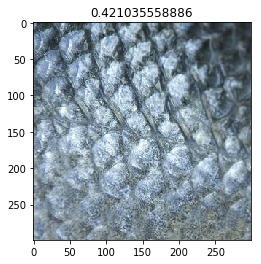

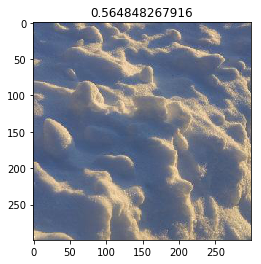

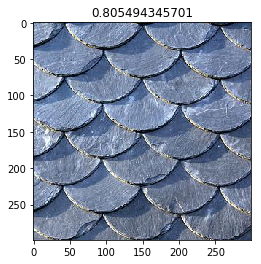

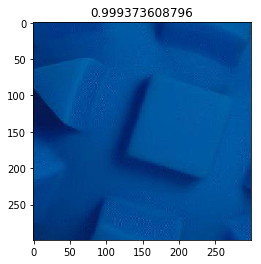

In [131]:
c = 'blue'
colorness_curve = []
plt.plot(np.sort(all_colorness[c]))

colorness_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

for cv in colorness_values:
    idx = np.argwhere(np.around(np.asarray(all_colorness[c]), decimals=1)==cv)[0]
    print idx[0]
    #colorness_curve.append(all_colorness[c][sorted_idxs[i]])
    t,j = hashcode_to_image(idx[0])
    plt.figure()
    plt.title(all_colorness[c][idx[0]])
    plt.imshow(dataset[textures[t]][j])
#plt.figure()
#plt.plot(np.asarray(colorness_curve))

In [152]:
measures

{'sprinkled.84': {'blue': 0.006084943121441594,
  'cyano': 0.010089372602096174,
  'green': 0.015313027818480778,
  'magenta': 6.711334325119406e-05,
  'orange': 0.27309537924631716,
  'purple': 0.00030201004463037325,
  'red': 0.24538875404078253,
  'yellow': 0.005950716434939206},
 'sprinkled.85': {'blue': 0.0,
  'cyano': 0.0,
  'green': 0.0,
  'magenta': 0.0,
  'orange': 0.8828536593550408,
  'purple': 0.0,
  'red': 0.0005145356315924878,
  'yellow': 0.0005369067460095525},
 'sprinkled.86': {'blue': 0.0,
  'cyano': 0.0,
  'green': 1.1185557208532343e-05,
  'magenta': 0.00030201004463037325,
  'orange': 0.03322110490934106,
  'purple': 0.0,
  'red': 0.2864509345533048,
  'yellow': 0.0013198957506068165},
 'sprinkled.87': {'blue': 0.0004362367311327614,
  'cyano': 0.0008501023478484581,
  'green': 8.948445766825875e-05,
  'magenta': 0.0003131956018389056,
  'orange': 0.30252458026196577,
  'purple': 3.355667162559703e-05,
  'red': 0.389581772015973,
  'yellow': 0.0006375767608863436},

In [164]:
dataset_cm_clr.close()

In [168]:
del cm_clr
for t in textures:
    k = 'colorness'
    for c in color_list:
        cm_clr = []
        for i in range(120):
            cm_clr.append(measures['{}.{}'.format(t,i)][c])
        #compute_concept_measures_colorness(dataset[t][:], color)
        dataset_cm_clr['{}.{}.{}'.format(t,k,c)] = cm_clr

In [169]:
dataset_cm_clr.visititems(print_info)

banded.colorfulness
banded.colorness.blue
banded.colorness.cyano
banded.colorness.green
banded.colorness.magenta
banded.colorness.orange
banded.colorness.purple
banded.colorness.red
banded.colorness.yellow
blotchy.colorfulness
blotchy.colorness.blue
blotchy.colorness.cyano
blotchy.colorness.green
blotchy.colorness.magenta
blotchy.colorness.orange
blotchy.colorness.purple
blotchy.colorness.red
blotchy.colorness.yellow
braided.colorfulness
braided.colorness.blue
braided.colorness.cyano
braided.colorness.green
braided.colorness.magenta
braided.colorness.orange
braided.colorness.purple
braided.colorness.red
braided.colorness.yellow
bubbly.colorfulness
bubbly.colorness.blue
bubbly.colorness.cyano
bubbly.colorness.green
bubbly.colorness.magenta
bubbly.colorness.orange
bubbly.colorness.purple
bubbly.colorness.red
bubbly.colorness.yellow
bumpy.colorfulness
bumpy.colorness.blue
bumpy.colorness.cyano
bumpy.colorness.green
bumpy.colorness.magenta
bumpy.colorness.orange
bumpy.colorness.purple
bump

In [170]:
dataset_cm_clr['banded.colorness.blue']

<HDF5 dataset "banded.colorness.blue": shape (120,), type "<f8">

In [171]:
dataset_cm_clr.close()